In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("http://51.91.120.89/extras/iris.csv")
df

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df["class"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [6]:
df["class_value"] = df["class"].map({
    "Iris-setosa" : 0, "Iris-versicolor" : 1, "Iris-virginica":2
})

In [7]:
df["class_value"].value_counts()

0    50
1    50
2    50
Name: class_value, dtype: int64

In [8]:
# nowy kwiatek w zbiorze
sample = np.array([5.6, 3.2, 5.2, 1.45])

In [9]:
df.columns

Index(['sepallength', 'sepalwidth', 'petallength', 'petalwidth', 'class',
       'class_value'],
      dtype='object')

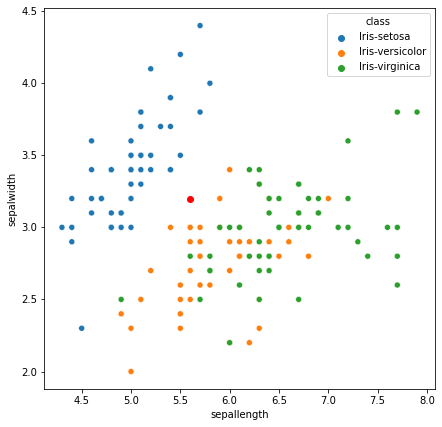

In [13]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="sepallength", y='sepalwidth', hue="class")
plt.scatter(sample[0], sample[1], c="r")

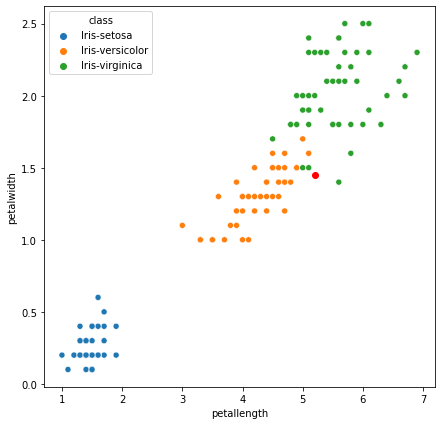

In [14]:
plt.figure(figsize=(7,7))
sns.scatterplot(data=df, x="petallength", y='petalwidth', hue="class")
plt.scatter(sample[2], sample[3], c="r")

In [15]:
df["distance"] = (df.sepallength-sample[0])**2 + (df.sepalwidth-sample[1])**2 +\
                 (df.petallength-sample[2])**2 + (df.petalwidth-sample[3])**2

In [18]:
df.sort_values("distance").head(3)["class"].value_counts()

Iris-versicolor    2
Iris-virginica     1
Name: class, dtype: int64

In [19]:
df.sort_values("distance").head(5)["class"].value_counts()

Iris-virginica     3
Iris-versicolor    2
Name: class, dtype: int64

In [20]:
df.sort_values("distance").head(7)["class"].value_counts()

Iris-virginica     5
Iris-versicolor    2
Name: class, dtype: int64

In [21]:
df.sort_values("distance").head(101)["class"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa         1
Name: class, dtype: int64

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [24]:
X = df.iloc[: , :4]
y = df.class_value

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [27]:
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

In [28]:
y_pred = model.predict(X_test)
pd.DataFrame( confusion_matrix(y_test, y_pred) )

,0,1,2
0,11,0,0
1,0,12,1
2,0,0,6


In [32]:
model.predict([sample]), model.predict_proba([sample])

(array([2], dtype=int64), array([[0. , 0.4, 0.6]]))

In [33]:
# dlaczego nie opłaca się podawać dużego "k"
result = []
for k in range(1,101):
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    result.append( model.score(X_test, y_test) )

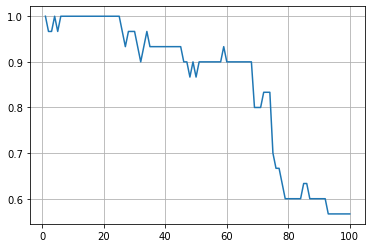

In [34]:
plt.plot( range(1,101) , result )
plt.grid()

In [35]:
# KNN dla cukrzycy
df = pd.read_csv("../Dzien01/cukrzyca.csv")
df.head()

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148.0,72.0,35.000000,155.102302,33.6,0.627,50.0,1
1,1,85.0,66.0,29.000000,155.102302,26.6,0.351,31.0,0
2,8,183.0,64.0,29.109665,155.102302,23.3,0.672,32.0,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1


In [37]:
X = df.iloc[:, :-1]
y = df.outcome

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

In [50]:
model = KNeighborsClassifier(5)
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7824675324675324

In [51]:
y_pred = model.predict(X_test)
pd.DataFrame( confusion_matrix(y_test, y_pred) )

,0,1
0,174,39
1,28,67


### Zapis/odczyt modelu do/z pliku

In [52]:
import joblib

In [53]:
# zapis modelu do pliku
joblib.dump(model, "cukrzyca.model")

['cukrzyca.model']

In [54]:
# odtworzenie modelu
model1 = joblib.load("cukrzyca.model")
model1

KNeighborsClassifier()

In [61]:
model1.predict_proba( [ df.iloc[0].values[:-1] ] )

array([[0., 1.]])

In [59]:
df

,pregnancies,glucose,bloodpressure,skinthickness,insulin,bmi,diabetespedigreefunction,age,outcome
0,6,148.0,72.0,35.000000,155.102302,33.6,0.627,50.0,1
1,1,85.0,66.0,29.000000,155.102302,26.6,0.351,31.0,0
2,8,183.0,64.0,29.109665,155.102302,23.3,0.672,32.0,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
1531,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63.0,0
1532,2,122.0,70.0,27.000000,155.102302,36.8,0.340,27.0,0
1533,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30.0,0
1534,1,126.0,60.0,29.109665,155.102302,30.1,0.349,47.0,1
